## Análisis datos ciudades.

📊📈 **Para realizar un pequeño análisis de las características principales de las ciudades se realizarán unos gráficos.**



❗ El objetivo principal es la búsqueda de alguna relación entre las variables que permitan identificar qué ciudad es más saludable y mejor para vivir.

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
ciud = pd.read_csv('../data/calidad_ciudades.csv', index_col = 0)
ciud.head(2)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),Coordinates,Latitude,Longitude
0,Amsterdam,1,1858.0,1.92,20.4,81.2,31.0,1434.0,7.44,422,1048,34.90,"(52.3727598, 4.8936041)",52.372760,4.893604
1,Sydney,2,2636.0,1.48,29.0,82.1,27.0,1712.0,7.22,406,1103,41.66,"(-33.8698439, 151.2082848)",-33.869844,151.208285


1️⃣📈 En primer lugar, se realiza un estudio de la relación existente entre la esperanza de vida y los niveles de obesidad en los países donde se sitúan las distintas ciudades

C:\Users\Pablo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


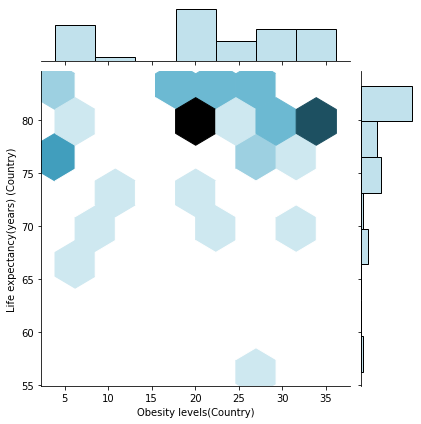

In [54]:
plt.rcParams["figure.figsize"] = (20, 8)

sns.jointplot(ciud['Obesity levels(Country)'],ciud['Life expectancy(years) (Country)'],
             kind = 'hex',
             color = 'lightblue' )
plt.savefig("../images/Esperanza de vida dependiendo de los niveles de obesidad.png")

plt.show();

🤔 Como se puede observar, no parece existir mucha relación entre los niveles de obesidad y esperanza de vida. Por ello, podemos pensar que la esperanza de vida puede estar más relacionada con otros aspectos como, por ejemplo, la polución.

2️⃣📊 De este modo, analizamos la relación existente entre la polución y la esperanza de vida.

C:\Users\Pablo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


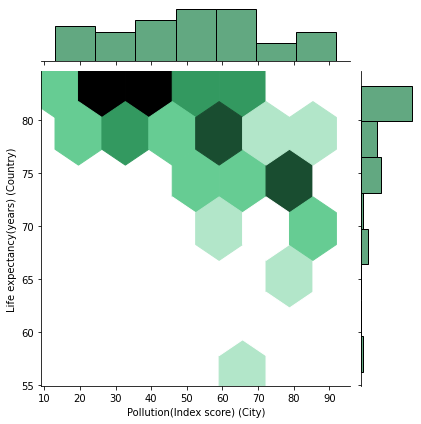

In [55]:
plt.rcParams["figure.figsize"] = (20, 8)

sns.jointplot(ciud['Pollution(Index score) (City)'],ciud['Life expectancy(years) (Country)'],
             kind = 'hex',
             color = 'seagreen')

plt.savefig("../images/Esperanza de vida dependiendo de los niveles de polución.png")

plt.show();

🧐 En este caso, la relación es mucho mayor. En países con una gran contaminación, la esperanza de vida es mucho menor.

3️⃣ Por otro lado, vamos a realizar un estudio de la influencia de las horas de sol en la felicidad de las personas, así como la cantidad de posibles espacios para realizar actividades al aire libre.

C:\Users\Pablo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


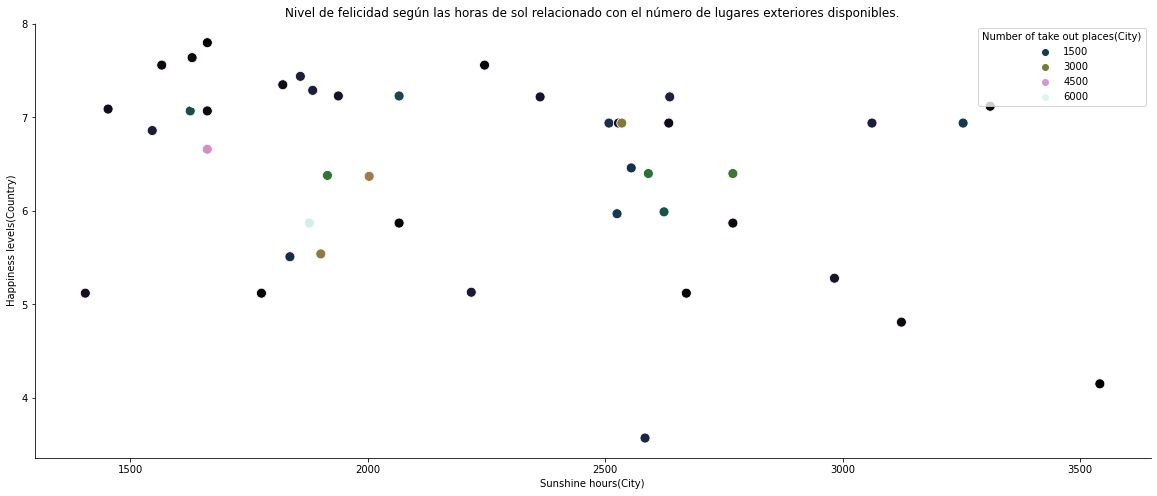

In [56]:
plt.rcParams["figure.figsize"] = (20, 8)

sol_felicidad = sns.scatterplot('Sunshine hours(City)', 'Happiness levels(Country)', data = ciud ,    
                hue = 'Number of take out places(City)',
                s = 100, 
                palette = "cubehelix");

sol_felicidad.set_facecolor("white")
sol_felicidad.spines['bottom'].set_color('black') 
sol_felicidad.spines['top'].set_color('white') 
sol_felicidad.spines['right'].set_color('white')
sol_felicidad.spines['left'].set_color('black')

plt.title("Nivel de felicidad según las horas de sol relacionado con el número de lugares exteriores disponibles.")

plt.savefig("../images/Felicidad de las personas dependiendo horas de sol y espacios al aire libre.png")

plt.show(); 


🤔 Una vez más, no parece existir una gran correlación entre el número de horas de sol y la felicidad de las personas. Además, estas tampoco repercuten en los espacios al aire libre. 

4️⃣📈 Por último, para analizar el número de actividades al aire libre, se comprobará si al existir un mayor número de horas de sol aumentan.

C:\Users\Pablo\AppData\Local\Temp/ipykernel_11252/1840224169.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  obras_gen.set_xticklabels(genres)


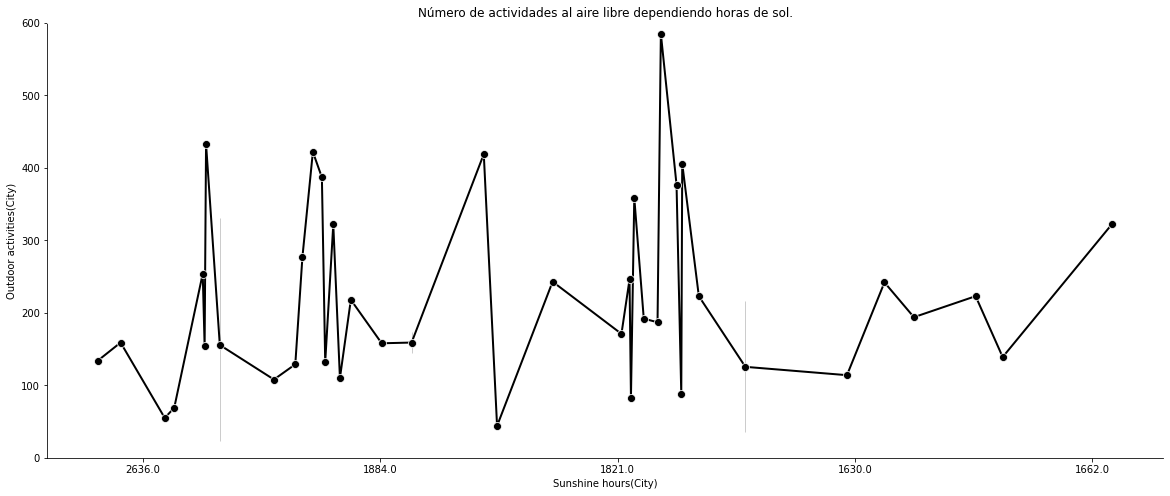

In [68]:
plt.rcParams["figure.figsize"] = (20, 8)
genres = ciud['Sunshine hours(City)']

obras_gen = sns.lineplot(data= ciud, x="Sunshine hours(City)", y="Outdoor activities(City)",
                    color = "black",
                    marker = 'o',
                    markersize = 8,
                    linewidth = 2);

obras_gen.set_facecolor("white")
obras_gen.spines['bottom'].set_color('black') 
obras_gen.spines['top'].set_color('white') 
obras_gen.spines['right'].set_color('white')
obras_gen.spines['left'].set_color('black')

plt.ylim(0,600)

obras_gen.set_xticklabels(genres)

plt.title("Número de actividades al aire libre dependiendo horas de sol.")
                     
plt.savefig("../images/Número de actividades al aire libre dependiendo horas de sol.png")
    
plt.show();

In [ ]:
🤔 El número de actividades realizadas al aire libre no parece estar relacionado con más horas de sol.